# Final Tutorial: x

**Adhithya Kannan & Kenton Wong**  
**CMSC320 Fall 2019 with John Dickerson**

## Introduction

In this day and age, standardized testing is a normal part of a student's life in secondary and even primary education. It is a way to not only each student's score relative to everyone else's in the state or even country but also to show the effectiveness of teachers and schools. This is executed by means of an objective measure based on the material of the questions and the delivery of the test. With the data collected from standardized tests, we can see statistics about proficiency, outliars, and other significant observations on a tested subject in a certain school or area.

While we are able to get our hands on data, we must 


Data found from all aggregated standarized testing math course data, not each individual grade. ```MTH00``` is the equivalent expresssion in each column. ``` NUMVALID ``` means the number of students who completed the state assessment (check explanation for all of these terms as well). ``` PCTPROF ``` is the percentage of students scoring ```>=``` state proficiency levels on assessment. 

Title could be visualizing the relationship between ethnicity and math in the standardized tests way of assessing proficiency. 

In [170]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# lets us see enough columns
pd.set_option('display.max_columns', 40)

## Retrieving/Tidying Data

In [171]:
df = pd.read_csv("data.csv")
# only use first 34 columns
df = df[df.columns[0:34]]

df.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,DATE_CUR,ALL_MTH00NUMVALID_1617,ALL_MTH00PCTPROF_1617,MAM_MTH00NUMVALID_1617,MAM_MTH00PCTPROF_1617,MAS_MTH00NUMVALID_1617,MAS_MTH00PCTPROF_1617,MBL_MTH00NUMVALID_1617,MBL_MTH00PCTPROF_1617,MHI_MTH00NUMVALID_1617,MHI_MTH00PCTPROF_1617,MTR_MTH00NUMVALID_1617,MTR_MTH00PCTPROF_1617,MWH_MTH00NUMVALID_1617,MWH_MTH00PCTPROF_1617,F_MTH00NUMVALID_1617,F_MTH00PCTPROF_1617,M_MTH00NUMVALID_1617,M_MTH00PCTPROF_1617,CWD_MTH00NUMVALID_1617,CWD_MTH00PCTPROF_1617,ECD_MTH00NUMVALID_1617,ECD_MTH00PCTPROF_1617,LEP_MTH00NUMVALID_1617,LEP_MTH00PCTPROF_1617,HOM_MTH00NUMVALID_1617,HOM_MTH00PCTPROF_1617,MIG_MTH00NUMVALID_1617,MIG_MTH00PCTPROF_1617
0,ALABAMA,1,100005,AL-101,Albertville City,12-Apr-18,2837,35,3,PS,17,40-59,92,15-19,1348,27,70,30-34,1307,45,1418,34,1419,36,178,20-24,2837,35,367,10,27,LE20,160,15-19
1,ALABAMA,1,100006,AL-048,Marshall County,12-Apr-18,2979,42,11,LT50,7,GE50,31,19-Nov,692,37,33,40-49,2205,43,1410,42,1569,41,459,12,2293,38,120,15-19,132,30-34,39,30-39
2,ALABAMA,1,100007,AL-158,Hoover City,12-Apr-18,7465,67,8,GE50,516,82,1852,45,579,50,293,60-64,4217,78,3590,68,3875,66,746,26,1964,44,249,20-24,28,21-39,NaN,NaN
3,ALABAMA,1,100008,AL-169,Madison City,12-Apr-18,5599,74,34,70-79,516,89,1147,52,295,60-64,224,75-79,3383,79,2699,75,2900,72,595,44,1218,52,112,30-34,39,60-69,NaN,NaN
4,ALABAMA,1,100011,AL-167,Leeds City,12-Apr-18,1003,37,3,PS,13,LT50,223,20-24,134,20-24,24,21-39,606,46,493,39,510,35,162,14-Oct,557,29,41,LE10,52,30-39,NaN,NaN


We make sure every value is either a valid value or an ``` np.nan ```. Any of the following columns in subset must have values otherwise it is not a valid row. There must be a total number of students overall, a state, a fipst (state number), a leaid, a st_leaid, a valid date. 

In [172]:
dt = df.copy()

arr = dt.apply(lambda e : (e.STNAM + e.ST_LEAID[2:]), axis=1)
dt = dt.assign(state_id=arr)
dt = dt.replace('NaN', np.nan)
dt = dt.replace('PS', np.nan)
# dt = dt.replace({'LE': '<=', 'GE': '>=', 'GT': '>', 'LT': '<', '\.': np.nan, 'n/a': np.nan}, regex=True)
# print(dt.loc[[2177]])

dt = dt.replace({'LE': '', 'GE': '', 'GT': '', 'LT': '', '\.': 0, 'n/a': 0,
                r'14-Oct':'14', r'9-Jun': '9', r'19-Nov': '9', '\d+\-': ''}, regex=True)

# we take the middle value in these ranges since they are misrepresented dates
        
# dt.head()

In [173]:
dt = dt.dropna(subset=['STNAM', 'LEANM', 'FIPST', 'LEAID', 'ST_LEAID', 'DATE_CUR', 'ALL_MTH00NUMVALID_1617', 'ALL_MTH00PCTPROF_1617'])

# dt = dt.drop('STNAM', 1)
# dt = dt.drop('FIPST', 1)
dt = dt.drop('LEAID', 1)
dt = dt.drop('ST_LEAID', 1)


mid = dt['state_id']
dt.drop(labels=['state_id'], axis=1,inplace = True)
dt.insert(0, 'state_id', mid)

dt = dt.drop('DATE_CUR', 1)

dt

,state_id,STNAM,FIPST,LEANM,ALL_MTH00NUMVALID_1617,ALL_MTH00PCTPROF_1617,MAM_MTH00NUMVALID_1617,MAM_MTH00PCTPROF_1617,MAS_MTH00NUMVALID_1617,MAS_MTH00PCTPROF_1617,MBL_MTH00NUMVALID_1617,MBL_MTH00PCTPROF_1617,MHI_MTH00NUMVALID_1617,MHI_MTH00PCTPROF_1617,MTR_MTH00NUMVALID_1617,MTR_MTH00PCTPROF_1617,MWH_MTH00NUMVALID_1617,MWH_MTH00PCTPROF_1617,F_MTH00NUMVALID_1617,F_MTH00PCTPROF_1617,M_MTH00NUMVALID_1617,M_MTH00PCTPROF_1617,CWD_MTH00NUMVALID_1617,CWD_MTH00PCTPROF_1617,ECD_MTH00NUMVALID_1617,ECD_MTH00PCTPROF_1617,LEP_MTH00NUMVALID_1617,LEP_MTH00PCTPROF_1617,HOM_MTH00NUMVALID_1617,HOM_MTH00PCTPROF_1617,MIG_MTH00NUMVALID_1617,MIG_MTH00PCTPROF_1617
0,ALABAMA-101,ALABAMA,1,Albertville City,2837,35,3,NaN,17,59,92,19,1348,27,70,34,1307,45,1418,34,1419,36,178,24,2837,35,367,10,27,20,160,19
1,ALABAMA-048,ALABAMA,1,Marshall County,2979,42,11,50,7,50,31,9,692,37,33,49,2205,43,1410,42,1569,41,459,12,2293,38,120,19,132,34,39,39
2,ALABAMA-158,ALABAMA,1,Hoover City,7465,67,8,50,516,82,1852,45,579,50,293,64,4217,78,3590,68,3875,66,746,26,1964,44,249,24,28,39,NaN,NaN
3,ALABAMA-169,ALABAMA,1,Madison City,5599,74,34,79,516,89,1147,52,295,64,224,79,3383,79,2699,75,2900,72,595,44,1218,52,112,34,39,69,NaN,NaN
4,ALABAMA-167,ALABAMA,1,Leeds City,1003,37,3,NaN,13,50,223,24,134,24,24,39,606,46,493,39,510,35,162,14,557,29,41,10,52,39,NaN,NaN
5,ALABAMA-115,ALABAMA,1,Boaz City,1279,45,6,50,13,50,23,39,394,31,38,59,805,51,613,44,666,45,105,24,879,39,97,9,29,39,24,39
6,ALABAMA-205,ALABAMA,1,Trussville City,2481,69,7,50,52,79,297,49,40,69,66,69,2019,71,1228,69,1253,69,194,29,232,49,3,NaN,3,NaN,NaN,NaN
7,ALABAMA-102,ALABAMA,1,Alexander City,1548,39,2,NaN,23,79,615,24,106,44,23,39,779,50,740,41,808,38,261,14,974,31,24,20,4,NaN,NaN,NaN
8,ALABAMA-104,ALABAMA,1,Andalusia City,910,44,NaN,NaN,15,50,266,24,18,79,14,50,597,53,425,48,485,40,107,9,531,30,8,50,3,NaN,NaN,NaN
9,ALABAMA-105,ALABAMA,1,Anniston City,923,22,NaN,NaN,1,NaN,824,21,38,29,12,50,47,49,451,24,472,21,95,19,923,22,7,50,71,24,NaN,NaN


In [174]:
df1 = dt.copy()

names = {
    # state assessment = (SA)
    'state_id': 'state_id', # full state name and id number
    'STNAM': 'state_name',
    'FIPST': 'ANSI_code', # The two-digit American National Standards Institute (ANSI) code for state 
    'LEANM': 'location', # location: district, city, county
    'DATE_CUR': 'most_recent_update', # most recent date that data was taken
    'ALL_MTH00NUMVALID_1617': 'all_completed', # total number of students per location that completed SA
    'ALL_MTH00PCTPROF_1617': 'all_proficient', # total number of students per location that were proficient in SA
    'MAM_MTH00NUMVALID_1617': 'american_indian_completed', # you get the picture
    'MAM_MTH00PCTPROF_1617': 'american_indian_proficient',
    'MAS_MTH00NUMVALID_1617': 'asian_completed',
    'MAS_MTH00PCTPROF_1617': 'asian_proficient',
    'MBL_MTH00NUMVALID_1617': 'black_completed',
    'MBL_MTH00PCTPROF_1617': 'black_proficient',
    'MHI_MTH00NUMVALID_1617': 'hispanic_completed',
    'MHI_MTH00PCTPROF_1617': 'hispanic_proficient',
    'MTR_MTH00NUMVALID_1617': 'multiracial_completed', # two or more races
    'MTR_MTH00PCTPROF_1617': 'multiracial_proficient',
    'MWH_MTH00NUMVALID_1617': 'white_completed',
    'MWH_MTH00PCTPROF_1617': 'white_proficient',
    'F_MTH00NUMVALID_1617': 'females_completed',
    'F_MTH00PCTPROF_1617': 'females_proficient',
    'M_MTH00NUMVALID_1617': 'males_completed',
    'M_MTH00PCTPROF_1617': 'males_proficient',
    'CWD_MTH00NUMVALID_1617': 'disability_completed', # children with disabilities
    'CWD_MTH00PCTPROF_1617': 'disability_proficient',
    'ECD_MTH00NUMVALID_1617': 'econ_disadvantage_completed', # economically disadvantaged
    'ECD_MTH00PCTPROF_1617': 'econ_disadvantage_proficient',
    'LEP_MTH00NUMVALID_1617': 'limited_english_completed', # limited english proficient students, english good for SA
    'LEP_MTH00PCTPROF_1617': 'limited_english_proficient',
    'HOM_MTH00NUMVALID_1617': 'homeless_completed', # homeless enrolled students
    'HOM_MTH00PCTPROF_1617': 'homeless_proficient',
    'MIG_MTH00NUMVALID_1617': 'migrant_completed', 
    'MIG_MTH00PCTPROF_1617': 'migrant_proficient'
}

df1.rename(inplace=True,columns=names)
# convert np.nan to -1 in specific columns so we can either ignore it or know that it isnt a valid value
# -1 specifically because it can be converted to an int
df1.all_proficient = df1.all_proficient.fillna(-1).astype(int)
df1.all_completed = df1.all_completed.fillna(-1).astype(int)
df1.asian_completed = df1.asian_completed.fillna(-1).astype(int)
df1.asian_proficient = df1.asian_proficient.fillna(-1).astype(int)
df1.black_completed = df1.black_completed.fillna(-1).astype(int)
df1.black_proficient = df1.black_proficient.fillna(-1).astype(int)
df1.hispanic_completed = df1.hispanic_completed.fillna(-1).astype(int)
df1.hispanic_proficient = df1.hispanic_proficient.fillna(-1).astype(int)
df1.white_completed = df1.white_completed.fillna(-1).astype(int)
df1.white_proficient = df1.white_proficient.fillna(-1).astype(int)
df1.econ_disadvantage_completed = df1.econ_disadvantage_completed.fillna(-1).astype(int)
df1.econ_disadvantage_proficient = df1.econ_disadvantage_proficient.fillna(-1).astype(int)

df1

,state_id,state_name,ANSI_code,location,all_completed,all_proficient,american_indian_completed,american_indian_proficient,asian_completed,asian_proficient,black_completed,black_proficient,hispanic_completed,hispanic_proficient,multiracial_completed,multiracial_proficient,white_completed,white_proficient,females_completed,females_proficient,males_completed,males_proficient,disability_completed,disability_proficient,econ_disadvantage_completed,econ_disadvantage_proficient,limited_english_completed,limited_english_proficient,homeless_completed,homeless_proficient,migrant_completed,migrant_proficient
0,ALABAMA-101,ALABAMA,1,Albertville City,2837,35,3,NaN,17,59,92,19,1348,27,70,34,1307,45,1418,34,1419,36,178,24,2837,35,367,10,27,20,160,19
1,ALABAMA-048,ALABAMA,1,Marshall County,2979,42,11,50,7,50,31,9,692,37,33,49,2205,43,1410,42,1569,41,459,12,2293,38,120,19,132,34,39,39
2,ALABAMA-158,ALABAMA,1,Hoover City,7465,67,8,50,516,82,1852,45,579,50,293,64,4217,78,3590,68,3875,66,746,26,1964,44,249,24,28,39,NaN,NaN
3,ALABAMA-169,ALABAMA,1,Madison City,5599,74,34,79,516,89,1147,52,295,64,224,79,3383,79,2699,75,2900,72,595,44,1218,52,112,34,39,69,NaN,NaN
4,ALABAMA-167,ALABAMA,1,Leeds City,1003,37,3,NaN,13,50,223,24,134,24,24,39,606,46,493,39,510,35,162,14,557,29,41,10,52,39,NaN,NaN
5,ALABAMA-115,ALABAMA,1,Boaz City,1279,45,6,50,13,50,23,39,394,31,38,59,805,51,613,44,666,45,105,24,879,39,97,9,29,39,24,39
6,ALABAMA-205,ALABAMA,1,Trussville City,2481,69,7,50,52,79,297,49,40,69,66,69,2019,71,1228,69,1253,69,194,29,232,49,3,NaN,3,NaN,NaN,NaN
7,ALABAMA-102,ALABAMA,1,Alexander City,1548,39,2,NaN,23,79,615,24,106,44,23,39,779,50,740,41,808,38,261,14,974,31,24,20,4,NaN,NaN,NaN
8,ALABAMA-104,ALABAMA,1,Andalusia City,910,44,NaN,NaN,15,50,266,24,18,79,14,50,597,53,425,48,485,40,107,9,531,30,8,50,3,NaN,NaN,NaN
9,ALABAMA-105,ALABAMA,1,Anniston City,923,22,NaN,NaN,1,-1,824,21,38,29,12,50,47,49,451,24,472,21,95,19,923,22,7,50,71,24,NaN,NaN


In [175]:
df2 = df1.copy()

g = df2.groupby('state_name')

md = g.get_group('MARYLAND')

# all completed * all_proficient = all_num_proficient
ak = g.get_group('ALASKA')

'''
econ-disadvantaged percentage compared to all students

assume you will do both all and all_p

percentage of econ_disadvantaged to all_students
percentage of each ethnicity to all_students

standardized data:
    compared percents for all econ_disadvantage, each ethnicity, and all
    compared to all, create standarized variable
        std_var_init: 
            alls = row['all_completed']
            allp = row['all_proficient']
            allp_i = int(alls) * (int(allp)//100)
            
            for x in row:
            if x.find('completed') >= 0
                df.loc[i][row] = row[x]//int(alls)


'''

'''
MODEL GRAPHS :

- EACH GRAPH REPRESENTS A WHOLE STATE
- X = %ECON_DISADV
    - %ECON_DISADV = #ECON_DISADV / #TOTAL
- Y = % PROFICIENCT PER RACE (GIVEN)
    - 4 RACES - WHITE, BLACK, ASIAN, HISPANIC
- EACH ROW PLOTS 1 POINT ON EACH 4 GRAPHS

- LIN REG ON EACH GRAPH
    - WE EXPECT NEGATIVE COEFFICIENT
    - DIFFERENCE IN SLOPE - 

- RESIDUALS?

'''

'\nMODEL GRAPHS :\n\n- EACH GRAPH REPRESENTS A WHOLE STATE\n- X = %ECON_DISADV\n    - %ECON_DISADV = #ECON_DISADV / #TOTAL\n- Y = % PROFICIENCT PER RACE (GIVEN)\n    - 4 RACES - WHITE, BLACK, ASIAN, HISPANIC\n- EACH ROW PLOTS 1 POINT ON EACH 4 GRAPHS\n\n- LIN REG ON EACH GRAPH\n    - WE EXPECT NEGATIVE COEFFICIENT\n    - DIFFERENCE IN SLOPE - \n\n- RESIDUALS?\n\n'

In [218]:
df3 = df2.copy()
# each column gets its own changes
# econ_disadvantage_completed	econ_disadvantage_proficient


def func(rc, ac, rp):
    if rc.any() == -1:
        return -1
    else:
        return ((rc / ac) * (rp/100))
    
def econf(r, a):
    if r.any() == -1:
        return -1
    else:
        return (r/a)
    
df3 = df3.assign(econ_disadvantage_score=lambda x: econf(r=x.econ_disadvantage_completed, a=x.all_completed))
df3 = df3.assign(asian_score=lambda x: func(x.asian_completed, x.all_completed, x.asian_proficient))
df3 = df3.assign(black_score=lambda x: func(rc=x.black_completed, ac=x.all_completed, rp=x.black_proficient))
df3 = df3.assign(hispanic_score=lambda x: func(rc=x.hispanic_completed, ac=x.all_completed, rp=x.hispanic_proficient))
df3 = df3.assign(white_score=lambda x: func(rc=x.white_completed, ac=x.all_completed, rp=x.white_proficient))

df3.sort_values('econ_disadvantage_score')

,state_id,state_name,ANSI_code,location,all_completed,all_proficient,american_indian_completed,american_indian_proficient,asian_completed,asian_proficient,black_completed,black_proficient,hispanic_completed,hispanic_proficient,multiracial_completed,multiracial_proficient,white_completed,white_proficient,females_completed,females_proficient,males_completed,males_proficient,disability_completed,disability_proficient,econ_disadvantage_completed,econ_disadvantage_proficient,limited_english_completed,limited_english_proficient,homeless_completed,homeless_proficient,migrant_completed,migrant_proficient,econ_disadvantage_score,asian_score,black_score,hispanic_score,white_score
11046,NORTH DAKOTA-30004,NORTH DAKOTA,38,LITT HEART 4,6,50,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,NaN,6,50,4,NaN,2,NaN,1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,-0.166667,0.001667,0.001667,0.001667,0.500000
735,ARIZONA-4401,ARIZONA,4,Pima Accommodation District,6,50,1,NaN,-1,-1,0,0,3,-1,NaN,NaN,2,-1,1,NaN,5,NaN,3,NaN,-1,-1,0,0,NaN,NaN,NaN,NaN,-0.166667,0.001667,0.000000,-0.005000,-0.003333
14331,TEXAS-133905,TEXAS,48,DIVIDE ISD,6,50,NaN,NaN,-1,-1,-1,-1,2,-1,1,NaN,3,-1,4,NaN,2,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,-0.166667,0.001667,0.001667,-0.003333,-0.005000
368,ARIZONA-78890,ARIZONA,4,Pathways KM Charter Schools Inc,6,50,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,NaN,6,50,1,NaN,5,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,-0.166667,0.001667,0.001667,0.001667,0.500000
356,ARIZONA-79439,ARIZONA,4,0,6,50,NaN,NaN,-1,-1,2,-1,3,-1,NaN,NaN,1,-1,3,NaN,3,NaN,1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,-0.166667,0.001667,-0.003333,-0.005000,-0.001667
10397,NEW YORK-581015080000,NEW YORK,36,NEW SUFFOLK COMMON SCHOOL DISTRICT,7,50,NaN,NaN,-1,-1,-1,-1,1,-1,NaN,NaN,6,50,5,NaN,2,NaN,1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,-0.142857,0.001429,0.001429,-0.001429,0.428571
248,ARIZONA-4324,ARIZONA,4,Global Renaissance Academy of Distinguished Ed...,7,50,NaN,NaN,-1,-1,-1,-1,2,-1,NaN,NaN,5,-1,4,NaN,3,NaN,1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,-0.142857,0.001429,0.001429,-0.002857,-0.007143
11055,NORTH DAKOTA-44012,NORTH DAKOTA,38,MARMARTH 12,7,50,NaN,NaN,-1,-1,-1,-1,-1,-1,NaN,NaN,7,50,2,NaN,5,NaN,2,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,-0.142857,0.001429,0.001429,0.001429,0.500000
15826,WASHINON-28010,WASHINON,53,Shaw Island School District,8,50,NaN,NaN,-1,-1,1,-1,-1,-1,NaN,NaN,7,50,4,NaN,4,NaN,1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,-0.125000,0.001250,-0.001250,0.001250,0.437500
12719,OREGON-00000000002047,OREGON,41,Pinehurst SD 94,8,50,NaN,NaN,-1,-1,-1,-1,-1,-1,1,NaN,7,50,3,NaN,5,NaN,1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,-0.125000,0.001250,0.001250,0.001250,0.437500


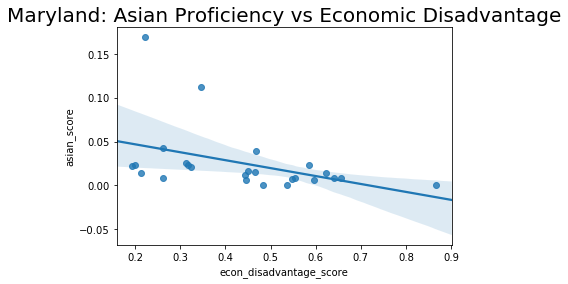

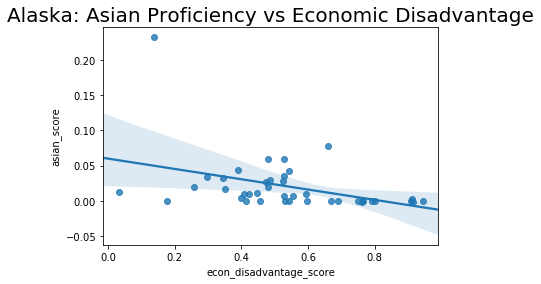

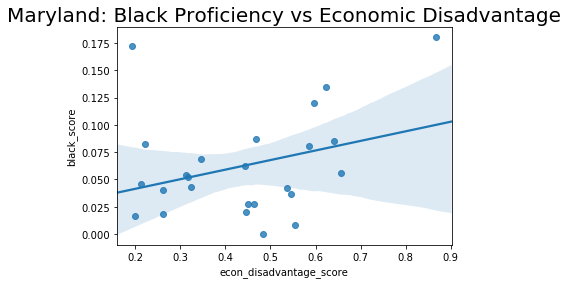

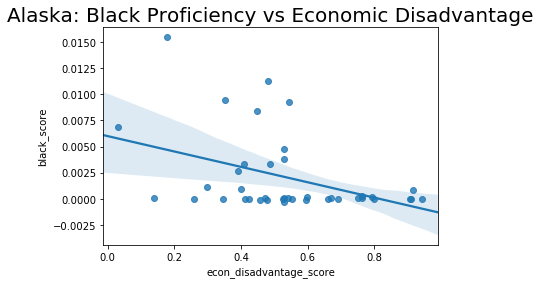

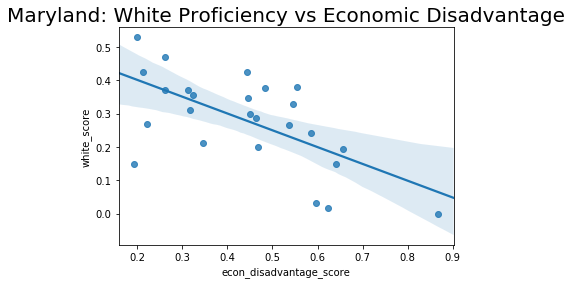

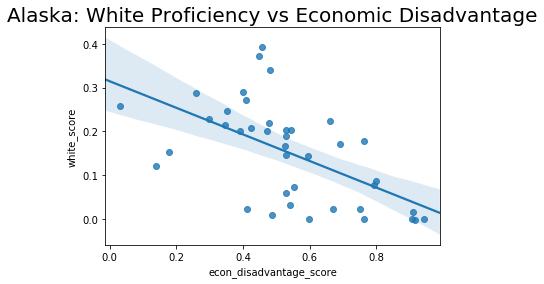

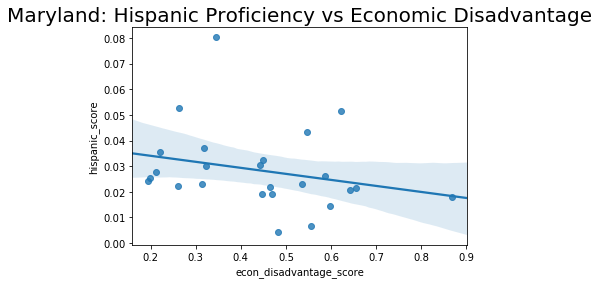

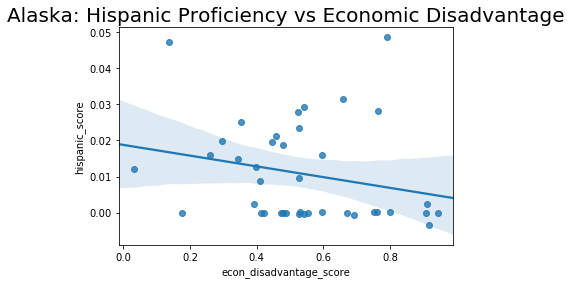

<Figure size 432x288 with 0 Axes>

In [238]:
dftemp = df3[df3.econ_disadvantage_completed != -1] # remove -1 for econ_disdvantage
dftemp = dftemp[dftemp.asian_completed != -1] #
    
g = dftemp.groupby('state_name')


d = {
    'asian_score': 'Asian',
    'black_score': 'Black',
    'white_score': 'White',
    'hispanic_score': 'Hispanic'
}


for k,v in d.items():
    #plt.figure(figsize=(20,10))
    plt.title('Maryland: ' + v + ' Proficiency vs Economic Disadvantage', fontsize=20)
    sns.regplot(data=g.get_group('MARYLAND'), x='econ_disadvantage_score', y=k)
    plt.show()
    plt.clf()
    
    #plt.figure(figsize=(20,10))
    plt.title('Alaska: ' + v + ' Proficiency vs Economic Disadvantage', fontsize=20)
    sns.regplot(data=g.get_group('ALASKA'), x='econ_disadvantage_score', y=k)
    plt.show()
    plt.clf()